## Source Information
---
**Created by**:

**Updated by**: October 25, 2024 by Gloria Seo

**Resources**: https://www.tensorflow.org/tutorials/images/classification

---

## Goal
This Jupyter notebook demonstrates how to build an image classification model using TensorFlow and Keras.
The goal is to classify images of flowers into five categories: daisies, dandelions, roses, sunflowers, and tulips. 

In [5]:
import tensorflow as tf

## Required Modules for the Jupyter Notebook

Before running the notebook, make sure to load the following modules.

**Module: tensorflow, numpy, PIL, matplotlib,keras,layers, Sequential, pathlib** 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

## Loading the Data Set
The dataset is a collection of flower photos available online. We use TensorFlow’s utility function to download and extract it.

The dataset used is a collection of flower images, which is freely available online. This notebook uses a TensorFlow utility function to download and extract these images. The dataset includes 3,670 images of the five flower categories.

In [7]:
# Image Classification Example for Comet, Stratus, Expanse

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/home/gseo/.keras/datasets/flower_photos')

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


It means that the total number of images in the dataset is 3670.

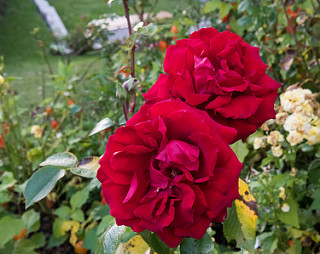

In [9]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [10]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


2024-10-23 00:37:28.651218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-10-23 00:37:28.651253: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: exp-13-59
2024-10-23 00:37:28.651259: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: exp-13-59
2024-10-23 00:37:28.651341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 510.39.1
2024-10-23 00:37:28.651356: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 525.85.12
2024-10-23 00:37:28.651361: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 525.85.12 does not match DSO version 510.39.1 -- cannot find working devices in this configuration


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


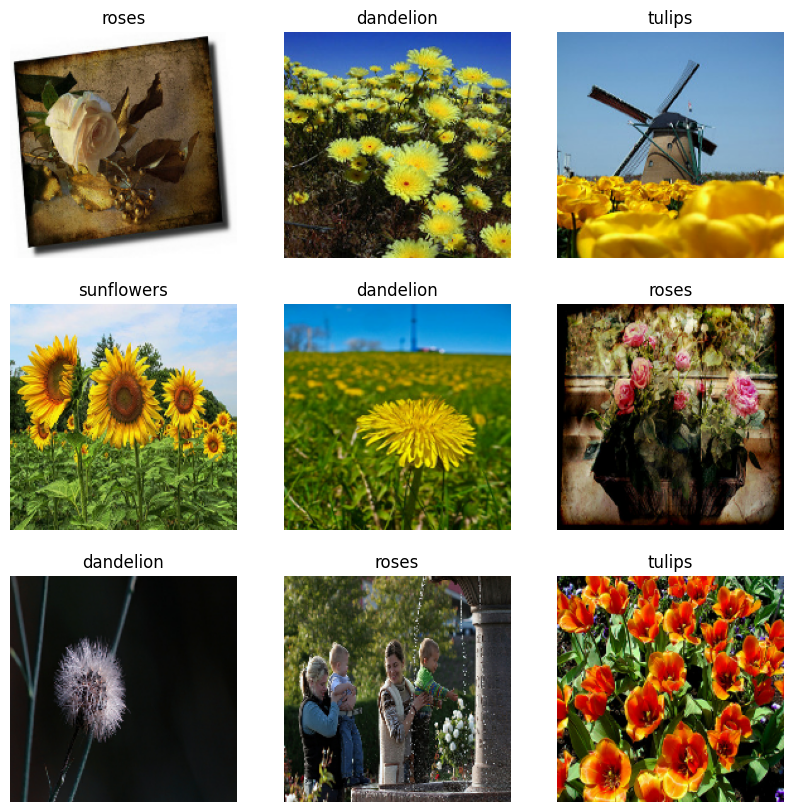

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [15]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In Tensorflow, you have to compile the model graph before you begin training. This speeds up the runtime.

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Finally, we actually get to train something!

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 7s 66ms/step - loss: 1.2741 - accuracy: 0.4683 - val_loss: 1.0617 - val_accuracy: 0.5708
Epoch 2/10
92/92 [==============================] - 5s 54ms/step - loss: 0.9718 - accuracy: 0.6182 - val_loss: 0.9059 - val_accuracy: 0.6621
Epoch 3/10
92/92 [==============================] - 5s 54ms/step - loss: 0.7815 - accuracy: 0.7064 - val_loss: 0.8407 - val_accuracy: 0.6703
Epoch 4/10
92/92 [==============================] - 5s 54ms/step - loss: 0.5992 - accuracy: 0.7796 - val_loss: 0.8889 - val_accuracy: 0.6771
Epoch 5/10
92/92 [==============================] - 5s 54ms/step - loss: 0.3854 - accuracy: 0.8675 - val_loss: 1.1897 - val_accuracy: 0.6131
Epoch 6/10
92/92 [==============================] - 5s 55ms/step - loss: 0.2260 - accuracy: 0.9261 - val_loss: 1.1761 - val_accuracy: 0.6826
Epoch 7/10
92/92 [==============================] - 5s 54ms/step - loss: 0.0990 - accuracy: 0.9724 - val_loss: 1.4352 - val_accuracy: 0.6689
Epoch 8/10
92

### Well we've trained... but now what? Did I do good?!
The answer is no. Run the below cell, and look at the graphs. The validation loss increases, while the training loss continues to decrease. This means your model is memorizing the training set, and isn't performing well on "real world" data (data it has never seen before). We're going to fix that by flipping and rotating the images in our dataset to artifically increase the number of pictures we have.

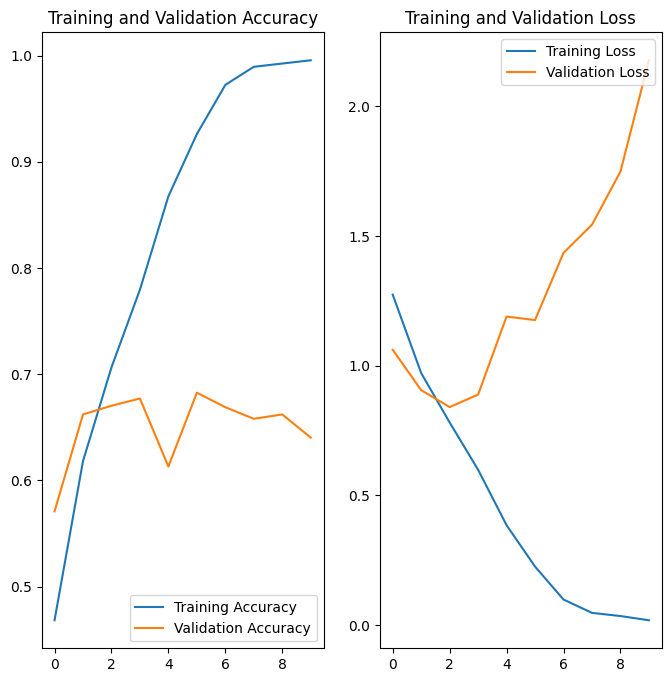

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

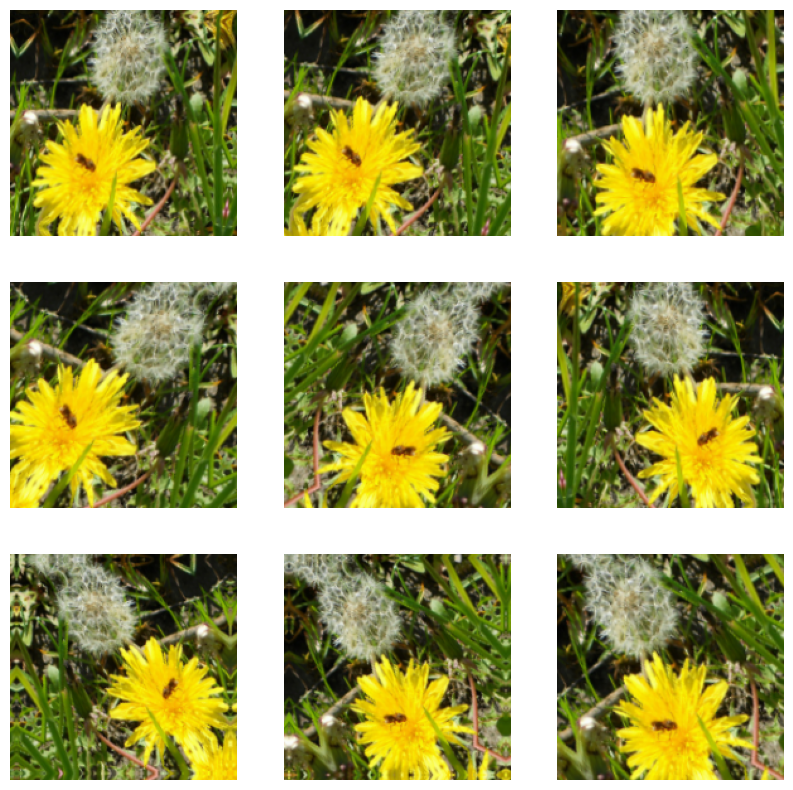

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

We're also going to introduce a dropout layer, which randomly removes some of the output layers. It does this because one of these layers may in fact be misleading, making us think our model did well when in reality this is a local minima of the function, not a global one. By doing this randomly we reduce this situation occuring enough to get a better model. The strong will survive, so even if we remove a good output its ok, its better than having a lot of misleading ones.

In [20]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [22]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 9s 85ms/step - loss: 1.4331 - accuracy: 0.3948 - val_loss: 1.1421 - val_accuracy: 0.5163
Epoch 2/15
92/92 [==============================] - 8s 84ms/step - loss: 1.0946 - accuracy: 0.5504 - val_loss: 1.0360 - val_accuracy: 0.5940
Epoch 3/15
92/92 [==============================] - 8s 84ms/step - loss: 0.9845 - accuracy: 0.6097 - val_loss: 0.9346 - val_accuracy: 0.6335
Epoch 4/15
92/92 [==============================] - 8s 85ms/step - loss: 0.9238 - accuracy: 0.6417 - val_loss: 0.9639 - val_accuracy: 0.6117
Epoch 5/15
92/92 [==============================] - 8s 83ms/step - loss: 0.8674 - accuracy: 0.6669 - val_loss: 0.8502 - val_accuracy: 0.6649
Epoch 6/15
92/92 [==============================] - 8s 84ms/step - loss: 0.8122 - accuracy: 0.6836 - val_loss: 0.9434 - val_accuracy: 0.6499
Epoch 7/15
92/92 [==============================] - 8s 82ms/step - loss: 0.7498 - accuracy: 0.7122 - val_loss: 0.8977 - val_accuracy: 0.6540
Epoch 8/15
92

After running the below cell, notice that the validation error decreases along with the training error.

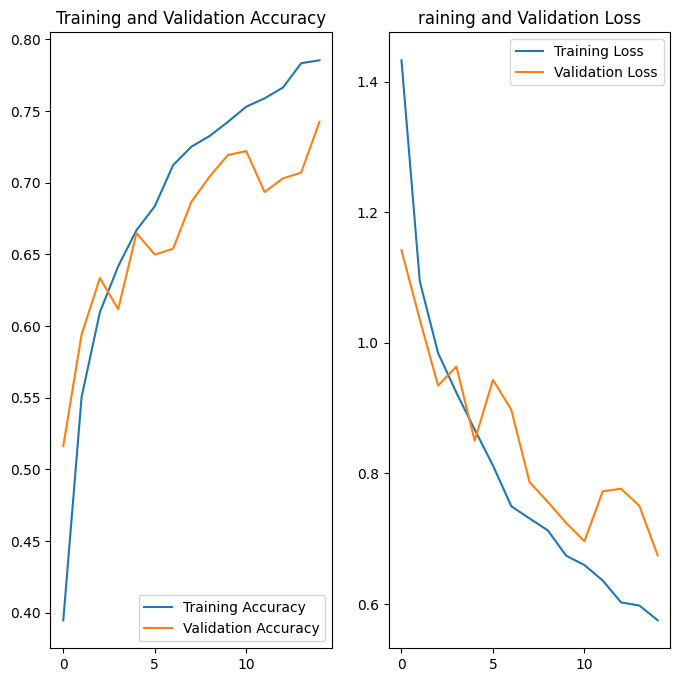

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('raining and Validation Loss')
plt.show()

In [24]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 84ms/step
This image most likely belongs to sunflowers with a 93.99 percent confidence.


## Submit Ticket
If you find anything that needs to be changed, edited, or if you would like to provide feedback or contribute to the notebook, please submit a ticket by contacting us at:

Email: consult@sdsc.edu

We appreciate your input and will review your suggestions promptly!